In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='datasets_478_974_mushrooms.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.shape

(8124, 23)

In [3]:
data.dropna(inplace=True)

In [4]:
data.shape

(8124, 23)

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

**Feature Engineering**

In [6]:
for x in data:
    print(data[x].unique())
    

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
#encoding categorical variables 
cat = [c for c in data if len(data[c].unique()) > 2]
cat

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [8]:
def calculateDistribution(cat, data):
  for c in cat:
    print(c)
    print((data[c].value_counts())/ len(data[c]))
    print(" ")
calculateDistribution(cat,data)

cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64
 
cap-surface
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: cap-surface, dtype: float64
 
cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
r    0.001969
u    0.001969
Name: cap-color, dtype: float64
 
odor
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: odor, dtype: float64
 
gill-color
b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k    0.050222
e    0.011817
y    0.010586
o    0.007878
r    0.002954
Name: gill-color, dtype: float64
 
stalk-root
b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: stalk-root, dtype: float64
 
stalk-surface-above-ring
s    0.637125
k    0.291974
f    0.067947
y    0.002954
Name: stalk-s

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in data:
    data[x]= le.fit_transform(data[x]) 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


**Hypothesis Testing**

In [10]:
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def ChiSquareTest(cat,data):
  
  for c in cat:
    print(c)
    tab = pd.crosstab(data['class'], data[c])
    stat, p, dof, expected = chi2_contingency(tab)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
     
    print(" ")

ChiSquareTest(cat,data)

cap-shape
dof=5
probability=0.950, critical=11.070, stat=489.920
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
cap-surface
dof=3
probability=0.950, critical=7.815, stat=315.043
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
cap-color
dof=9
probability=0.950, critical=16.919, stat=387.598
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
odor
dof=8
probability=0.950, critical=15.507, stat=7659.727
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
gill-color
dof=11
probability=0.950, critical=19.675, stat=3765.714
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
stalk-root
dof=4
probability=0.950, critical=9.488, stat=1344.441
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
stalk-surface-above-ring
dof=3
probability=0.950, critical=7.815, stat=2808.286
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
stalk-surfa

In [11]:
cat_binary = [c for c in data if len(data[c].unique()) == 2]
cat_binary
def cramers_v(x, y):
  correlation_coeff = []
  for c in cat_binary:
    confusion_matrix = pd.crosstab(data[c],y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    correlation_coeff.append([c,np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))])
    
  return correlation_coeff
cramers_v(cat_binary, data['class'])
ChiSquareTest(cat_binary,data)

class
dof=1
probability=0.950, critical=3.841, stat=8119.995
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
bruises
dof=1
probability=0.950, critical=3.841, stat=2041.416
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
gill-attachment
dof=1
probability=0.950, critical=3.841, stat=133.986
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
gill-spacing
dof=1
probability=0.950, critical=3.841, stat=984.143
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
gill-size
dof=1
probability=0.950, critical=3.841, stat=2366.834
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
stalk-shape
dof=1
probability=0.950, critical=3.841, stat=84.142
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 


From the chi-sqaure test results, it is clear that the target variable 'class' is dependent on all of the explanatory variables and Null Hypothesis can be rejected.

**Univariate Analysis**

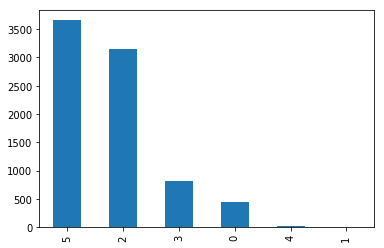

In [12]:
data['cap-shape'].value_counts().plot.bar()

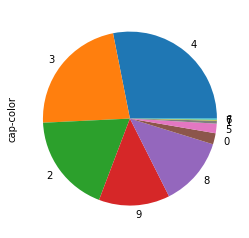

In [13]:
data['cap-color'].value_counts().plot.pie()

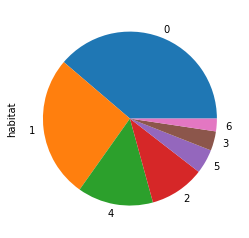

In [14]:
data['habitat'].value_counts().plot.pie()

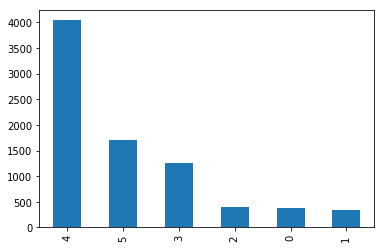

In [15]:
data['population'].value_counts().plot.bar()

In [16]:
data['class']=data['class'].astype('category')

In [17]:
X=data.drop(['class'],axis=1)
y=data['class']

In [18]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: category
Categories (2, int64): [0, 1]

### Classification Models


**1. Logistic Regression**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5686, 22) (5686,)
Test set: (2438, 22) (2438,)


In [21]:
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
#Predicting
y_preds = LR.predict(X_test)
y_preds

array([0, 0, 1, ..., 0, 1, 1])

In [23]:
print(y_preds[0:5],y_test[0:5])

[0 0 1 0 1] 2853    0
1031    1
5891    1
7325    0
7138    1
Name: class, dtype: category
Categories (2, int64): [0, 1]


In [24]:
#Probabilily of each class for the test values
ypreds_prob = LR.predict_proba(X_test)
ypreds_prob[0:5]

array([[0.91316474, 0.08683526],
       [0.60765333, 0.39234667],
       [0.01943836, 0.98056164],
       [0.96744581, 0.03255419],
       [0.0506315 , 0.9493685 ]])

In [25]:
#Evaluation of model
#Jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_preds)

0.9105824446267432

In [26]:
#confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_preds, labels=[1,0]))


[[1004  166]
 [  52 1216]]


Confusion matrix, without normalization
[[1004  166]
 [  52 1216]]


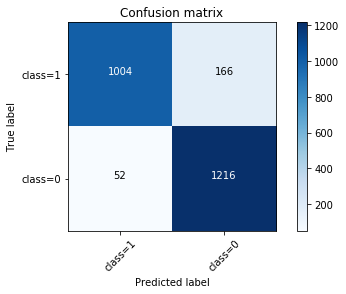

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [28]:
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1268
           1       0.95      0.86      0.90      1170

   micro avg       0.91      0.91      0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438



**2. K-Nearest Neighbours**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#choosing the best K
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_prediction=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_prediction)

    
    std_acc[n-1]=np.std(y_prediction==y_test)/np.sqrt(y_prediction.shape[0])

mean_acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

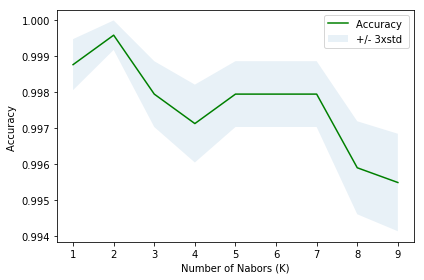

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

The given graph suggests that K=2 would provide the greatest level of accuracy.

In [31]:
#Build model using K=2
k = 2 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [32]:
y_prediction = neigh.predict(X_test)
print(y_test[0:5],y_prediction[0:5])

2853    0
1031    1
5891    1
7325    0
7138    1
Name: class, dtype: category
Categories (2, int64): [0, 1] [0 1 1 0 1]


In [33]:
#Evaluation of model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_prediction))

Train set Accuracy:  0.9998241294407316
Test set Accuracy:  0.9995898277276456


In [34]:
jaccard_similarity_score(y_test, y_prediction)

0.9995898277276456

Confusion matrix, without normalization
[[1170    0]
 [   1 1267]]


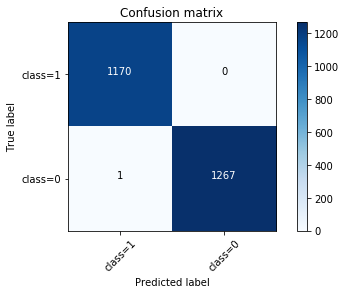

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [36]:
print (classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



**3. Support Vector Machine**

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(yhat [0:5],y_test[0:5])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 1 1 0 1] 2853    0
1031    1
5891    1
7325    0
7138    1
Name: class, dtype: category
Categories (2, int64): [0, 1]


In [38]:
#Evaluation of model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9998241294407316
Test set Accuracy:  1.0


Confusion matrix, without normalization
[[1170    0]
 [   0 1268]]


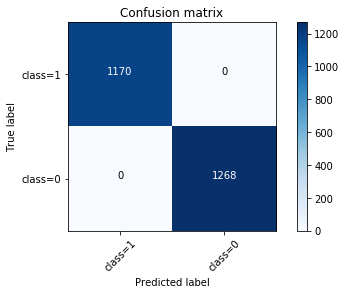

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



**4. Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
mush_class = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
mush_class

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
mush_class.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
predTree = mush_class.predict(X_test)

In [44]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 1 0 1]
2853    0
1031    1
5891    1
7325    0
7138    1
Name: class, dtype: category
Categories (2, int64): [0, 1]


In [45]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


Confusion matrix, without normalization
[[1170    0]
 [   0 1268]]


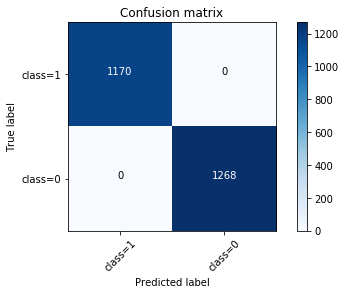

In [46]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [47]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

